In [1]:
import pandas as pd
from astropy.table import Table

# Importing data

In [2]:
DIRECTORY_DATA = 'data/originals/'
FILE_DATA = 'Furlan_2016_SED-data.txt'

table = Table.read(DIRECTORY_DATA+FILE_DATA, format='ascii.cds')
hops = table.to_pandas()

# Exploring data

In [43]:
hops.shape

(410, 73)

In [44]:
hops.head()

,Object,JFlux,e_JFlux,f_JFlux,HFlux,e_HFlux,f_HFlux,KsFlux,e_KsFlux,f_KsFlux,...,e_19.0Flux,23.0Flux,e_23.0Flux,27.0Flux,e_27.0Flux,31.0Flux,e_31.0Flux,35.0Flux,e_35.0Flux,factor
0,HOPS-0,0.000000,0.000000,3,0.000299,0.000067,1,0.000630,0.000083,1,...,0.000602,0.008059,0.002417,0.009411,0.003058,0.01119,0.005751,0.0129,0.004328,1.00
1,HOPS-1,0.000000,0.000000,3,0.000000,0.000000,3,0.000000,0.000000,3,...,0.018830,0.297200,0.021800,0.573400,0.049910,0.87460,0.045530,1.1850,0.064600,1.17
2,HOPS-2,0.000277,0.000050,1,0.002060,0.000102,1,0.008557,0.000205,1,...,0.017910,0.296600,0.016410,0.345600,0.010030,0.37700,0.021900,0.3704,0.030350,1.00
3,HOPS-3,0.002198,0.000089,1,0.005048,0.000139,1,0.009263,0.000205,1,...,0.017730,0.279300,0.004127,0.313600,0.021110,0.34060,0.018580,0.4050,0.024430,1.66
4,HOPS-4,0.000382,0.000053,1,0.000921,0.000075,1,0.001975,0.000111,1,...,0.004881,0.242100,0.010950,0.339600,0.003942,0.40980,0.010050,0.4943,0.034840,1.00


In [45]:
hops.dtypes

Object         object
JFlux         float64
e_JFlux       float64
f_JFlux         int64
HFlux         float64
               ...   
31.0Flux      float64
e_31.0Flux    float64
35.0Flux      float64
e_35.0Flux    float64
factor        float64
Length: 73, dtype: object

## Flags:

f_* columns are flags for flux:  0 = not observed; 1 = measured; 2 = upper limit; 3 = not detected

In [5]:
hops_flags = hops.filter(regex='^f_')
hops_flags.head()

,f_JFlux,f_HFlux,f_KsFlux,f_3.6Flux,f_4.5Flux,f_5.8Flux,f_8.0Flux,f_24Flux,f_70Flux,f_100Flux,f_160Flux,f_350Flux,f_870Flux
0,3,1,1,1,1,1,1,1,0,3,0,0,0
1,3,3,3,1,1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,1,1,1,1,2,2
3,1,1,1,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,1,0,2


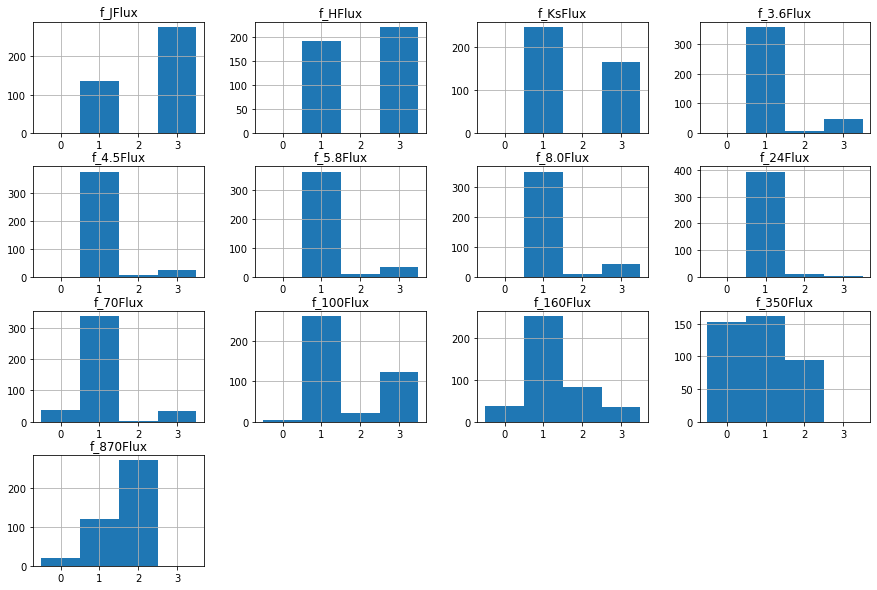

In [6]:
bins=[-0.5,0.5,1.5,2.5,3.5];
hops_flags.hist(bins=bins,figsize=(15, 10));

* 2MASS (J,H,K) flux is not detected (f = 3) for most of the sample
* Part of the data was not observed (f = 0) at 350 micron (APEX/LABOCA) mostly
* In practice I can considered all flags except observed (f = 1) as missing values.

# Test 1: Removing data that has missing values in at least one column

In [75]:
hops_flags.shape

(410, 13)

In [65]:
new_hops = hops_flags[hops_flags.eq(1).all(axis=1)]

In [69]:
new_hops

,f_JFlux,f_HFlux,f_KsFlux,f_3.6Flux,f_4.5Flux,f_5.8Flux,f_8.0Flux,f_24Flux,f_70Flux,f_100Flux,f_160Flux,f_350Flux,f_870Flux
94,1,1,1,1,1,1,1,1,1,1,1,1,1
136,1,1,1,1,1,1,1,1,1,1,1,1,1
166,1,1,1,1,1,1,1,1,1,1,1,1,1
188,1,1,1,1,1,1,1,1,1,1,1,1,1
194,1,1,1,1,1,1,1,1,1,1,1,1,1
221,1,1,1,1,1,1,1,1,1,1,1,1,1
223,1,1,1,1,1,1,1,1,1,1,1,1,1
248,1,1,1,1,1,1,1,1,1,1,1,1,1
315,1,1,1,1,1,1,1,1,1,1,1,1,1
365,1,1,1,1,1,1,1,1,1,1,1,1,1


There are too few :(. Need to think something else.